<a href="https://colab.research.google.com/github/pmehta-2011/clustering/blob/main/meanshiftcluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [3]:
# Load the Wine dataset
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

In [4]:
# Function to apply log transformation
def apply_transformation(X, method='log'):
    if method == 'log':
        return np.log1p(X)  # log(1 + X) to avoid negative values
    elif method == 'sqrt':
        return np.sqrt(X)  # square root transformation
    else:
        return X

In [5]:
# Apply PCA (for dimensionality reduction)
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

In [6]:
# Plot clusters for PCA-reduced data
def plot_clusters(X, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

In [7]:
# Perform Mean Shift Clustering and display metrics
def mean_shift_clustering(X, bandwidth=None, title="Mean Shift Clustering"):
    if bandwidth is None:
        bandwidth = estimate_bandwidth(X, quantile=0.2)

    model = MeanShift(bandwidth=bandwidth)
    clusters = model.fit_predict(X)
    n_clusters = len(np.unique(clusters))

    # Plot clusters
    plot_clusters(X, clusters, title)

    # Only calculate metrics if more than one cluster is found
    if n_clusters > 1:
        silhouette_avg = silhouette_score(X, clusters)
        calinski_harabasz = calinski_harabasz_score(X, clusters)
        davies_bouldin = davies_bouldin_score(X, clusters)

        # Print metrics summary
        print(f"\n{title} (Bandwidth={bandwidth:.4f})")
        print(f"Number of clusters: {n_clusters}")
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
        print(f"Davies-Bouldin Score: {davies_bouldin:.4f}\n")

        return clusters, silhouette_avg, calinski_harabasz, davies_bouldin
    else:
        print(f"\n{title} (Bandwidth={bandwidth:.4f})")
        print(f"Number of clusters: {n_clusters}")
        print("Only one cluster found. Metrics cannot be computed.\n")
        return clusters, None, None, None

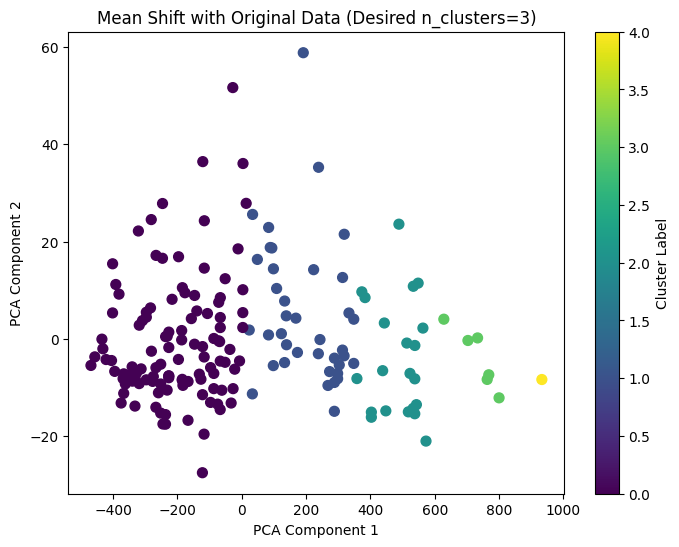


Mean Shift with Original Data (Desired n_clusters=3) (Bandwidth=125.4373)
Number of clusters: 5
Silhouette Score: 0.5541
Calinski-Harabasz Score: 287.3830
Davies-Bouldin Score: 0.4536



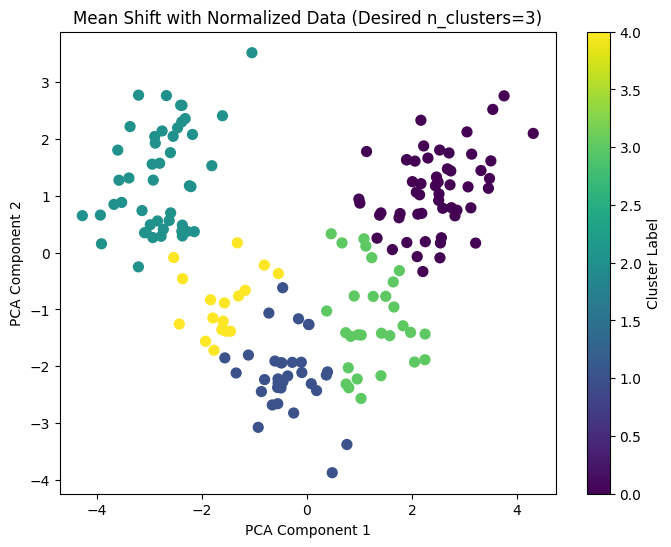


Mean Shift with Normalized Data (Desired n_clusters=3) (Bandwidth=1.5256)
Number of clusters: 5
Silhouette Score: 0.4407
Calinski-Harabasz Score: 293.5631
Davies-Bouldin Score: 0.7490



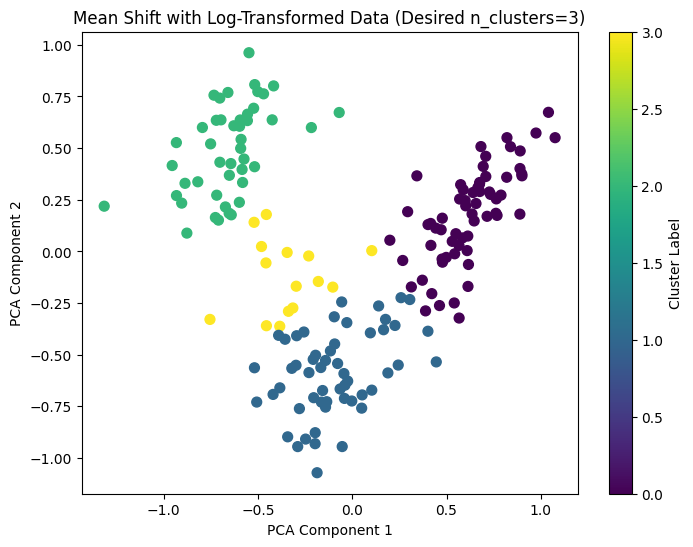


Mean Shift with Log-Transformed Data (Desired n_clusters=3) (Bandwidth=0.3974)
Number of clusters: 4
Silhouette Score: 0.4828
Calinski-Harabasz Score: 298.9056
Davies-Bouldin Score: 0.7690



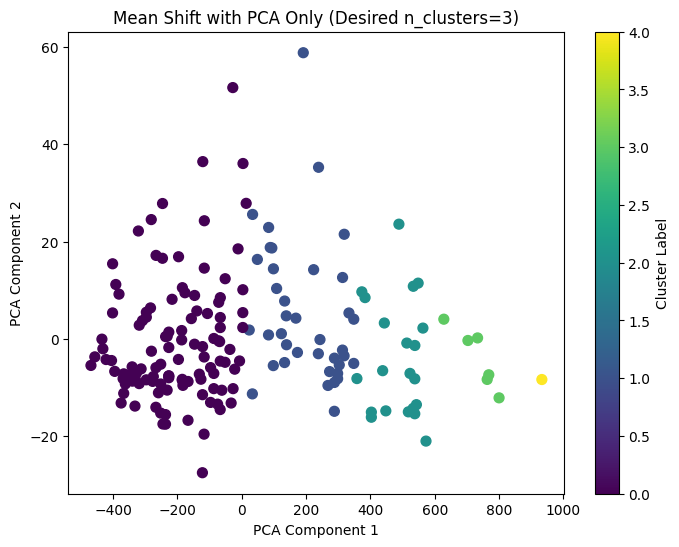


Mean Shift with PCA Only (Desired n_clusters=3) (Bandwidth=125.4373)
Number of clusters: 5
Silhouette Score: 0.5541
Calinski-Harabasz Score: 287.3830
Davies-Bouldin Score: 0.4536



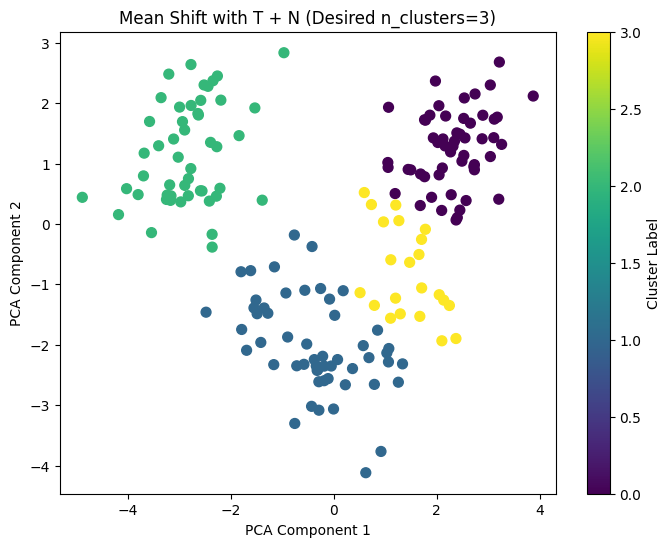


Mean Shift with T + N (Desired n_clusters=3) (Bandwidth=1.4932)
Number of clusters: 4
Silhouette Score: 0.4915
Calinski-Harabasz Score: 337.7492
Davies-Bouldin Score: 0.7460



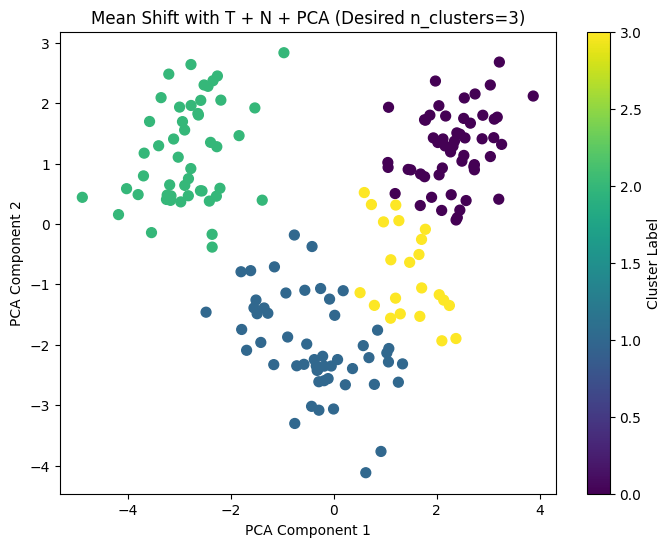


Mean Shift with T + N + PCA (Desired n_clusters=3) (Bandwidth=1.4932)
Number of clusters: 4
Silhouette Score: 0.4915
Calinski-Harabasz Score: 337.7492
Davies-Bouldin Score: 0.7460



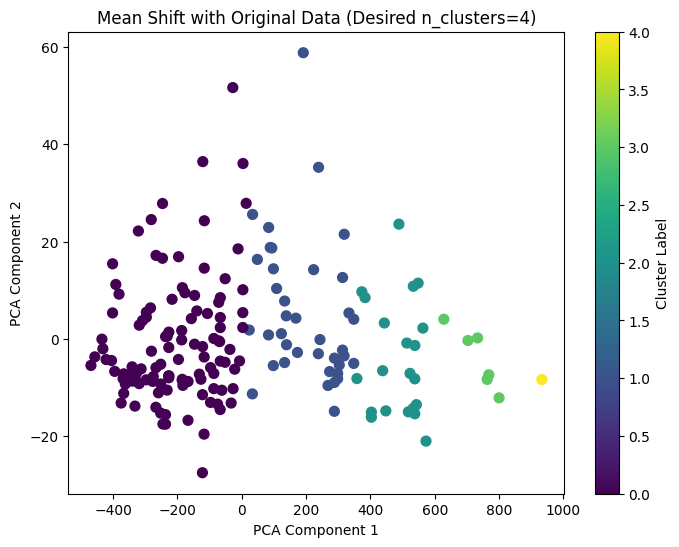


Mean Shift with Original Data (Desired n_clusters=4) (Bandwidth=125.4373)
Number of clusters: 5
Silhouette Score: 0.5541
Calinski-Harabasz Score: 287.3830
Davies-Bouldin Score: 0.4536



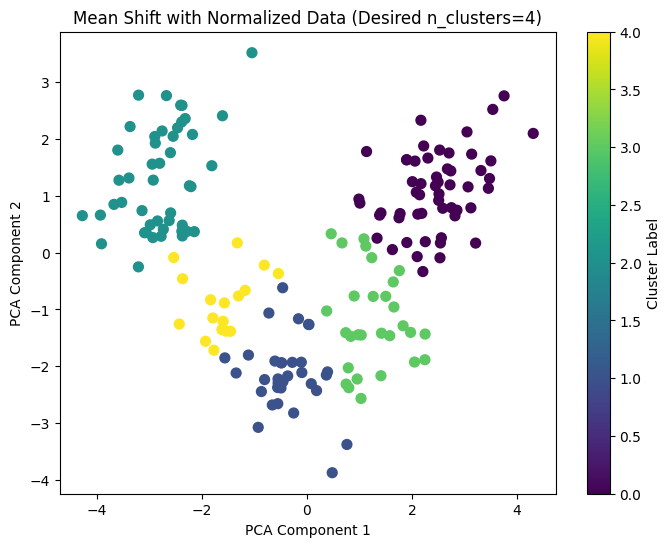


Mean Shift with Normalized Data (Desired n_clusters=4) (Bandwidth=1.5256)
Number of clusters: 5
Silhouette Score: 0.4407
Calinski-Harabasz Score: 293.5631
Davies-Bouldin Score: 0.7490



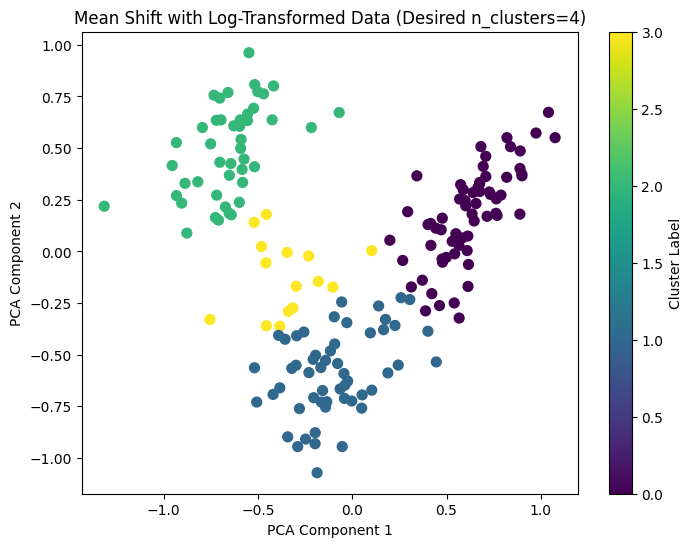


Mean Shift with Log-Transformed Data (Desired n_clusters=4) (Bandwidth=0.3974)
Number of clusters: 4
Silhouette Score: 0.4828
Calinski-Harabasz Score: 298.9056
Davies-Bouldin Score: 0.7690



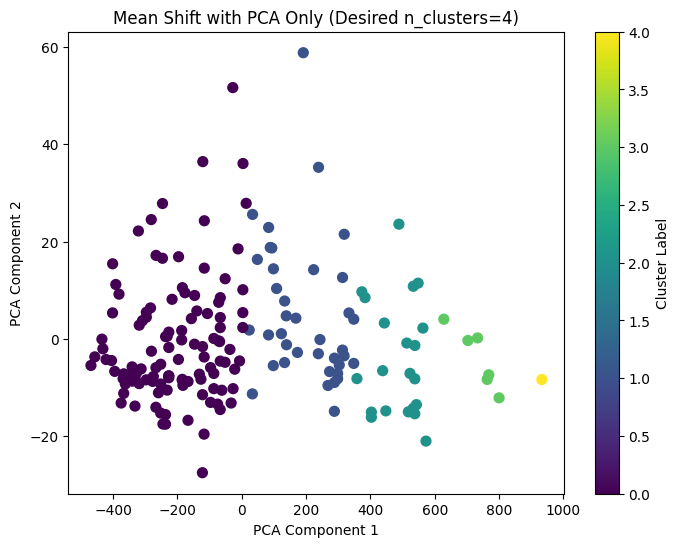


Mean Shift with PCA Only (Desired n_clusters=4) (Bandwidth=125.4373)
Number of clusters: 5
Silhouette Score: 0.5541
Calinski-Harabasz Score: 287.3830
Davies-Bouldin Score: 0.4536



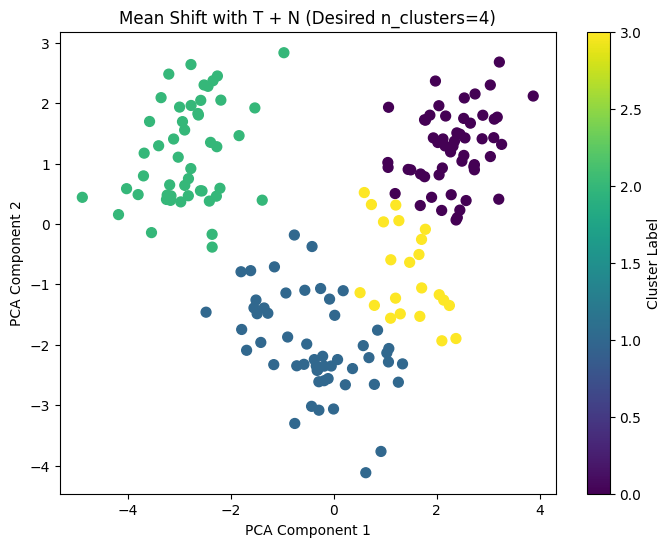


Mean Shift with T + N (Desired n_clusters=4) (Bandwidth=1.4932)
Number of clusters: 4
Silhouette Score: 0.4915
Calinski-Harabasz Score: 337.7492
Davies-Bouldin Score: 0.7460



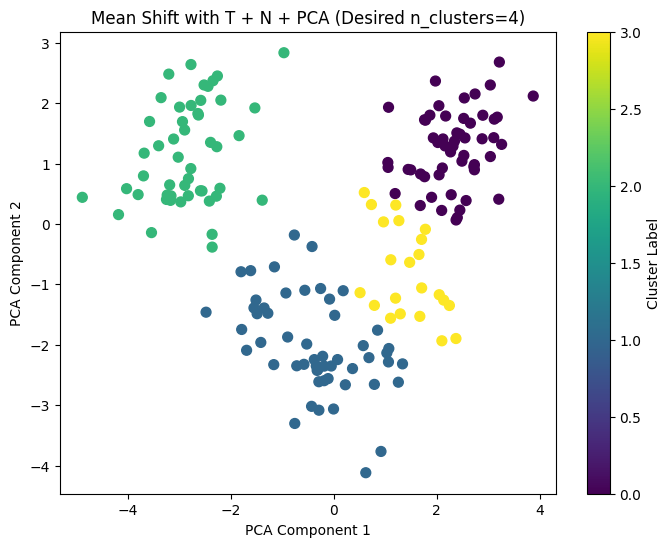


Mean Shift with T + N + PCA (Desired n_clusters=4) (Bandwidth=1.4932)
Number of clusters: 4
Silhouette Score: 0.4915
Calinski-Harabasz Score: 337.7492
Davies-Bouldin Score: 0.7460



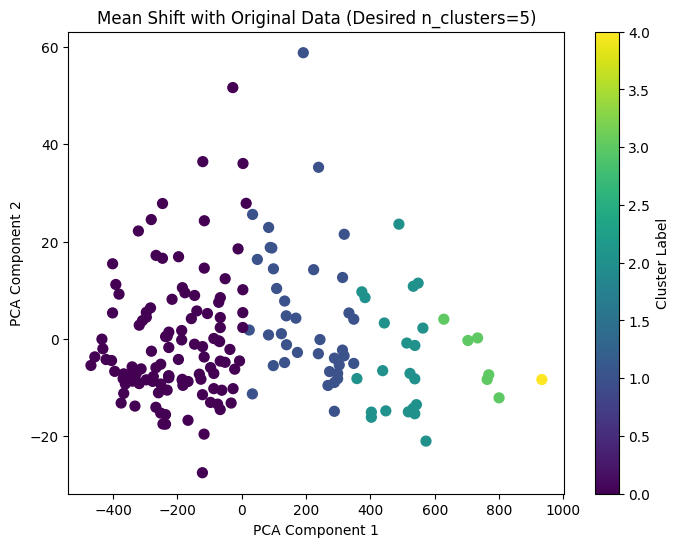


Mean Shift with Original Data (Desired n_clusters=5) (Bandwidth=125.4373)
Number of clusters: 5
Silhouette Score: 0.5541
Calinski-Harabasz Score: 287.3830
Davies-Bouldin Score: 0.4536



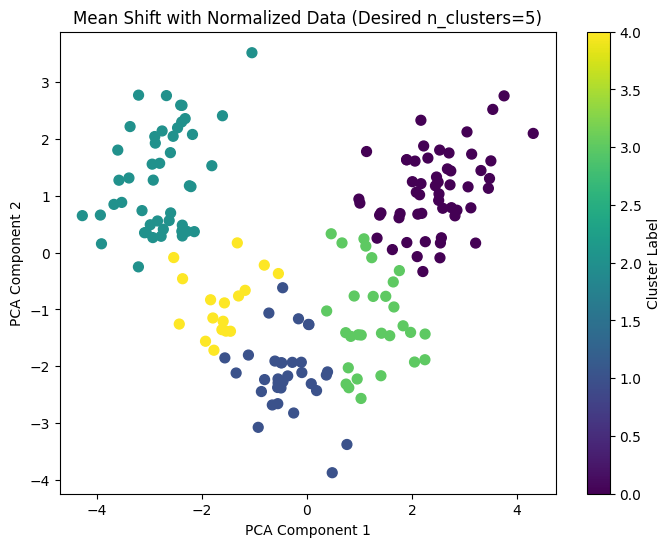


Mean Shift with Normalized Data (Desired n_clusters=5) (Bandwidth=1.5256)
Number of clusters: 5
Silhouette Score: 0.4407
Calinski-Harabasz Score: 293.5631
Davies-Bouldin Score: 0.7490



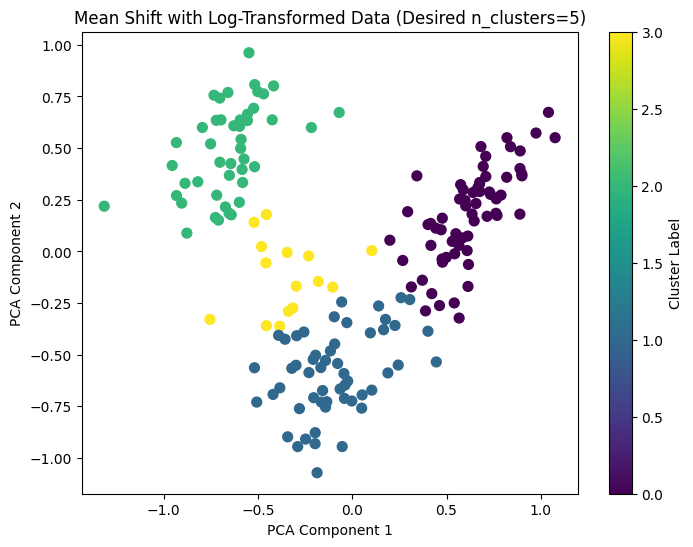


Mean Shift with Log-Transformed Data (Desired n_clusters=5) (Bandwidth=0.3974)
Number of clusters: 4
Silhouette Score: 0.4828
Calinski-Harabasz Score: 298.9056
Davies-Bouldin Score: 0.7690



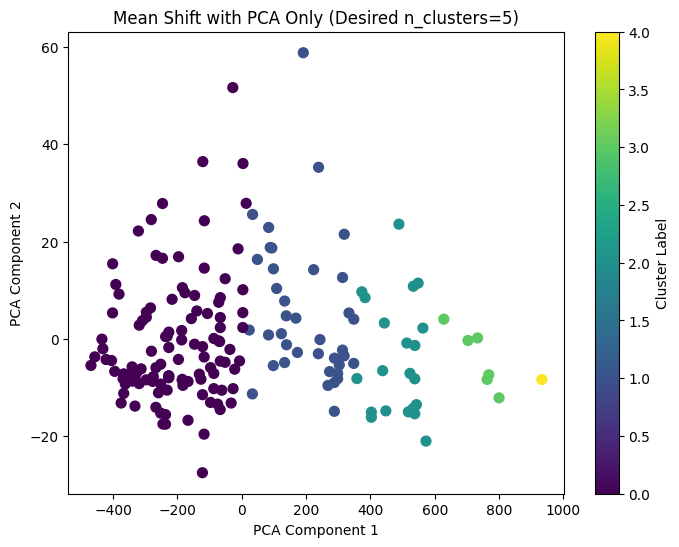


Mean Shift with PCA Only (Desired n_clusters=5) (Bandwidth=125.4373)
Number of clusters: 5
Silhouette Score: 0.5541
Calinski-Harabasz Score: 287.3830
Davies-Bouldin Score: 0.4536



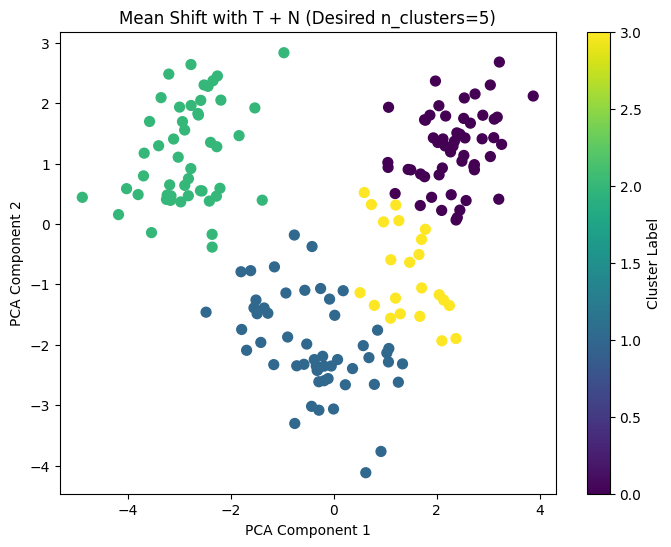


Mean Shift with T + N (Desired n_clusters=5) (Bandwidth=1.4932)
Number of clusters: 4
Silhouette Score: 0.4915
Calinski-Harabasz Score: 337.7492
Davies-Bouldin Score: 0.7460



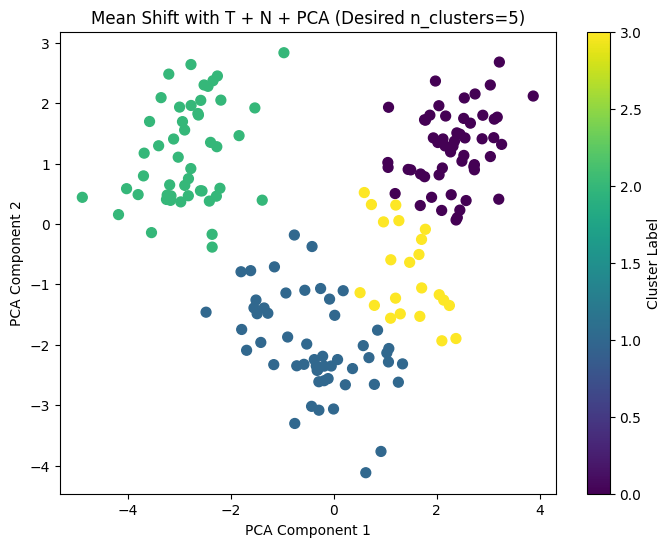


Mean Shift with T + N + PCA (Desired n_clusters=5) (Bandwidth=1.4932)
Number of clusters: 4
Silhouette Score: 0.4915
Calinski-Harabasz Score: 337.7492
Davies-Bouldin Score: 0.7460


Summary of Clustering Results:
    Desired n_clusters  Actual n_clusters  Silhouette Score  \
0                    3                  5          0.554068   
1                    3                  5          0.440727   
2                    3                  4          0.482811   
3                    3                  5          0.554068   
4                    3                  4          0.491508   
5                    3                  4          0.491508   
6                    4                  5          0.554068   
7                    4                  5          0.440727   
8                    4                  4          0.482811   
9                    4                  5          0.554068   
10                   4                  4          0.491508   
11                   4        

In [8]:
# Run Mean Shift clustering with desired number of clusters (simulated by adjusting bandwidth)
def run_mean_shift_clustering(X, cluster_values=[2, 3, 4]):
    results = {
        "Desired n_clusters": [],
        "Actual n_clusters": [],
        "Silhouette Score": [],
        "Calinski-Harabasz Score": [],
        "Davies-Bouldin Score": []
    }

    methods = ["Original Data", "Normalized Data", "Log-Transformed Data", "PCA Only", "T + N", "T + N + PCA"]

    for n_clusters in cluster_values:
        for method in methods:
            if method == "Original Data":
                X_pca = apply_pca(X, n_components=2)
            elif method == "Normalized Data":
                scaler = StandardScaler()
                X_normalized = scaler.fit_transform(X)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "Log-Transformed Data":
                X_transformed = apply_transformation(X, method='log')
                X_pca = apply_pca(X_transformed, n_components=2)
            elif method == "PCA Only":
                X_pca = apply_pca(X, n_components=2)
            elif method == "T + N":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "T + N + PCA":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)

            # Run Mean Shift clustering and plot results
            clusters, silhouette_avg, calinski_harabasz, davies_bouldin = mean_shift_clustering(X_pca, title=f"Mean Shift with {method} (Desired n_clusters={n_clusters})")

            # Store results in the table only if more than one cluster is found
            if silhouette_avg is not None:
                results["Desired n_clusters"].append(n_clusters)
                results["Actual n_clusters"].append(len(np.unique(clusters)))
                results["Silhouette Score"].append(silhouette_avg)
                results["Calinski-Harabasz Score"].append(calinski_harabasz)
                results["Davies-Bouldin Score"].append(davies_bouldin)

    # Create a DataFrame from the results
    df_results = pd.DataFrame(results)

    # Print the final summary table
    print("\nSummary of Clustering Results:")
    print(df_results)
    return df_results

# Run Mean Shift clustering with specified desired cluster values
mean_shift_results = run_mean_shift_clustering(X, cluster_values=[3, 4, 5])
